# Project 'hard problems': traveling salesman problem

*Selected Topics in Mathematical Optimization: 2017-2018*

**Michiel Stock** ([email](michiel.stock@ugent.be))

![](Figures/logo.png)

Bram De Jaegher, Daan Van Hauwermeiren

In [1]:
# everything you need for the TSP!
from tsp_utils import *

import random
import pandas as pd
import itertools

%matplotlib inline

## The traveling salesman problem

> **Traveling salesman problem (TSP)**: Given a list of cities and the distances between each pair of cities, find
the *tour* with the lowest possible total cost that visits each city exactly once and returns to
the origin city.

- $n$ cities $x_1,\ldots,x_n$.
- Cost matrix $C[x_i, x_j]$ (possibly symmetric and/or triangle inequality).
- Search space is all permutations of cities: size of $(n-1)!$.
- Objective function: sum of costs of the paths.

For this problem, the 'cities' are represented as points on the 2D plane. The $x,y$-coordinates are stored in the Numpy array `coordinates` and the distances between two cities are found in the Numpy array `distances`.

In [2]:
coordinates[:10]

array([[484, 800],
       [441, 796],
       [485, 794],
       [480, 793],
       [522, 791],
       [465, 789],
       [419, 787],
       [406, 785],
       [474, 785],
       [520, 785]])

In [3]:
n = len(coordinates)
print('There are {} cities.'.format(n))

There are 1025 cities.


In [4]:
distances[:10,:10]

array([[   0.        ,   43.18564576,    6.08276253,    8.06225775,
          39.05124838,   21.9544984 ,   66.28725368,   79.42921377,
          18.02775638,   39.        ],
       [  43.18564576,    0.        ,   44.04543109,   39.11521443,
          81.15417426,   25.        ,   23.76972865,   36.68787266,
          34.78505426,   79.76214641],
       [   6.08276253,   44.04543109,    0.        ,    5.09901951,
          37.12142239,   20.61552813,   66.37017402,   79.51100553,
          14.2126704 ,   36.138622  ],
       [   8.06225775,   39.11521443,    5.09901951,    0.        ,
          42.04759208,   15.5241747 ,   61.29437168,   74.43117626,
          10.        ,   40.79215611],
       [  39.05124838,   81.15417426,   37.12142239,   42.04759208,
           0.        ,   57.03507693,  103.07764064,  116.15506877,
          48.37354649,    6.32455532],
       [  21.9544984 ,   25.        ,   20.61552813,   15.5241747 ,
          57.03507693,    0.        ,   46.04345773,   59

Cities are referred by their respective index.  A tour is implemented as a list of the permutation of the indices of $n$ cities, e.g. `[0, 1, 2, ..., n-1]`. Note that the cost is invariant w.r.t. cyclic permutations, i.e. the cost is the same independent from which city the tour starts.

In [5]:
tour = list(range(n))

tour

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Some simple function are provided to compute the length of a given tour and to plot the cities and a tour.

Cost of tour is 106075.756


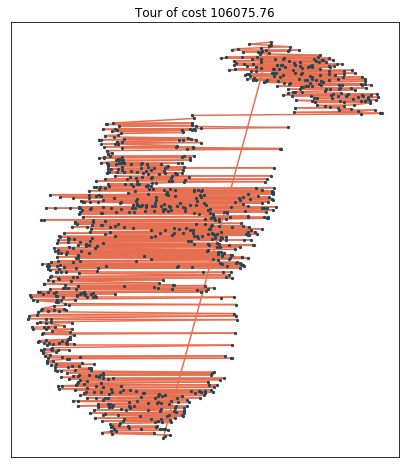

In [6]:
cost = compute_tour_cost(tour, distances)
print('Cost of tour is {:.3f}'.format(cost))

fig, ax = plt.subplots(figsize=(8, 8))
plot_cities(ax, coordinates, color=blue)  # plot cities as a scatter plot
plot_tour(ax, tour, coordinates, distances, color=red, title=True)  # add the tour

A tour can be saved and loaded in a JSON file. You have to hand in your best tour!

In [7]:
save_tour('Data/my_tour.json', tour)

loaded_tour = load_tour('Data/my_tour.json')

In [8]:
!rm Data/my_tour.json

## Assignments

Implement *two* heuristic algorithms for finding a low-cost tour:

- write a report in the notebook discussing your strategy and the final results;
- embed the code with sufficient documentation;
- plot your final best tour in your notebook with the total cost.

## Report

Two heuristic algorithms were tested to find a low-cost tour that includes all cities, i.e. **nearest insertion** and **simulated annealing**. 
Instead of evaluating these algorithms separately, they were chained to optimally use the benefits of both techniques. Nearest insertion is a **constructive** heuristic which builds a solution step by step, following an defined set of rules until a feasible solution of the TSP problem is obtained. Next, simulated annealing is used as an **improvement** heuristic which starts from a feasible solution and tries to improve is by applying small perturbations to the solution. A two phase approach with a constructive and improvement phase is also known as a **compound** approach.   

### Heuristic 1: Nearest insertion

As a constructive heuristic for the TSP problem, nearest insertion (NI) is a four step iterative procedure [[1]](https://paginas.fe.up.pt/~mac/ensino/docs/OR/HowToSolveIt/ConstructiveHeuristicsForTheTSP.pdf),

1. *Initialisation:* Start with a partial tour of just one city, randomly chosen.
2. *Selection:* Find the city that is not yet in the tour with a minimal addition cost. (cost of the two new connections) 
3. *Insertion:* Break open tour and at this city.
4. If all cities are inserted, **break**, else **go back to step 2**.


**Function definition**

In [8]:
def nearest_insertion(distances,vertex_lst):
    """
    Source: https://paginas.fe.up.pt/~mac/ensino/docs/OR/HowToSolveIt/ConstructiveHeuristicsForTheTSP.pdf
    
    Algorithm
    1. Initialization – Start with a partial tour with just one city i, randomly chosen;
    find the city j for which cij (distance or cost from i to j) is minimum
    and build the partial tour (i, j).
    
    2. Selection – Find cities k and j (j belonging to the partial tour and k not
    belonging) for which ckj is minimized.
    
    3. Insertion – Find the edge {i, j}, belonging to the partial tour, that
    minimizes cik + ckj − cij. Insert k between i and j.
    
    4. If all cities are inserted then STOP, else go back to 2.
    """
    
    tour = []
    distance_df = pd.DataFrame(distances)
    
    # 1. Initialisation: random selection of vertex
    tour.append(random.choice(vertex_lst))
    distance_df.drop(tour[0],inplace=True) # remove from queue
    
    while len(tour)<len(vertex_lst):
        tempMin = 1e10
        k = 0 # vertex to add
        
        # 2. Selection: find closest vertex not in partial tour 
        for index in tour:
            if distance_df[index].min() < tempMin:
                tempMin = distance_df[index].min()
                k = distance_df[index].argmin()
        
        distance_df.drop(k,inplace=True) # Remove from distance matrix so this vertex can't be used again
        
        if len(tour) <= 1: # No insertion if < 2 vertices in partial tour 
            tour.append(k)
        else: 
            
            # 3. Insertion: find the edge in the partial tour that should open to include new vertex 
            edge_lst = [(tour[i],tour[i+1]) for i in range(0,len(tour)-1)] # construct list of edges
            distance_lst = list(map(lambda i: distances[i[0],k] + distances[k,i[1]] -distances[i[0],i[1]],edge_lst)) # compute the distance gain
            insertionInd = min([(v,i) for i,v in enumerate(distance_lst)])[1]+1 # find edge with minimum distance gain
            tour.insert(insertionInd,k) # insert this edge
    return tour

**Computer NI**

In [9]:
tour = list(range(n))
best_tour = nearest_insertion(distances,tour)
cost = compute_tour_cost(best_tour, distances,check=True)
print('Cost of tour is {:.3f}'.format(cost))  # improvement!

**Plotting tour**

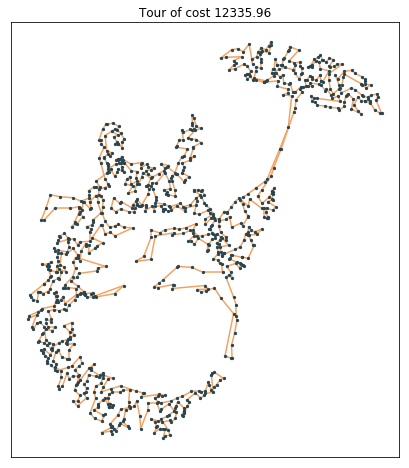

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

plot_cities(ax, coordinates, color=blue)  # plot cities as a scatter plot
plot_tour(ax, best_tour, coordinates, distances, color=orange, title=True)  # add the tour

From the figure above, it is clear that NI works quite well for this problem. In what follows a parallel approach is developed to construct a tour starting from different initial cities. In retrospect the only stochasticity is the initial city, so we should have iterated over all starting cities instead of randomly selecting one. 

The simulation results were stored in .json format, so there is no need of computing it again.  The following code snippet illustrates how the results were obtained. 

All unique solutions are loaded, the first part of the filename is the total cost, list is sorted on this cost.

In [17]:
import glob

In [18]:
filenames = sorted(glob.glob('./data_nearest_insertion/*json'),
                  key=lambda i: float(i.split('/')[-1][:-5]))

In [19]:
filenames

['./data_nearest_insertion/12248.685123293219.json',
 './data_nearest_insertion/12261.501202034531.json',
 './data_nearest_insertion/12266.509292938714.json',
 './data_nearest_insertion/12268.4839279599.json',
 './data_nearest_insertion/12268.878105862812.json',
 './data_nearest_insertion/12268.986578597665.json',
 './data_nearest_insertion/12269.71968652823.json',
 './data_nearest_insertion/12270.166359995654.json',
 './data_nearest_insertion/12273.062137920586.json',
 './data_nearest_insertion/12276.849992854923.json',
 './data_nearest_insertion/12278.044302062648.json',
 './data_nearest_insertion/12278.50663858036.json',
 './data_nearest_insertion/12278.976331732541.json',
 './data_nearest_insertion/12278.976331732543.json',
 './data_nearest_insertion/12279.279595231483.json',
 './data_nearest_insertion/12280.23476409111.json',
 './data_nearest_insertion/12280.285407118545.json',
 './data_nearest_insertion/12280.346220003885.json',
 './data_nearest_insertion/12281.094692431483.json'

In [21]:
best_tour = load_tour(filenames[0])

Cost of tour is 12248.685


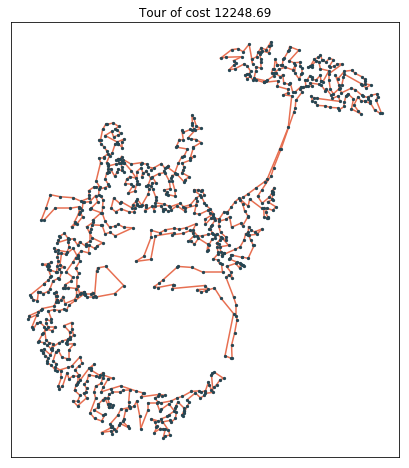

In [22]:
cost = compute_tour_cost(best_tour, distances, check=True)
print('Cost of tour is {:.3f}'.format(cost))

fig, ax = plt.subplots(figsize=(8, 8))
plot_cities(ax, coordinates, color=blue)  # plot cities as a scatter plot
plot_tour(ax, best_tour, coordinates, distances, color=red, title=True)  # add the tour

As can be seen, a minor improvement is achieved by choosing a different starting city for the NI heuristic. 

### Heuristic 2: Simulated annealing

As mentioned previously, simulated annealing (SA) can be used to improve the solution obtained by NI. 

**Importing libraries**

In [25]:
import math
from copy import deepcopy

**Function definitions**

In [27]:
def simulated_annealing(Tmax, Tmin, r, kT,
    scoring=compute_tour_cost, distances=distances, tour=None):
    """
    Uses simulated annealing to find an aproximately optimal olution to the TSP

    Inputs:
        - distances : distances of one node to the others
        - tour: starting tour
        - Tmax : maximum (starting) temperature
        - Tmin : minimum (stopping) temperature
        - r : rate of cooling
        - kT : number of iteration with fixed temperature

    Outputs:
        - best_tour : best found tour
        - fbest : best scores obtained through the iterations
        - temperatures : temperature during the iterations
    """
    # if no tour is given, create initial tour
    if tour is None:
        tour = list(range(distances.shape[0]))
        # random shuffle the initial tour (INPLACE!)
        #random.shuffle(tour)    
    temp = Tmax
    fstar = scoring(tour, distances)
    fbest = [fstar]
    temperatures = [temp]
    
    size = len(tour)
    
    while temp > Tmin:
        # repeat kT times
        for __ in range(kT):
            
            # get neighbour and score it
            # hardcoded the option to only swap neighbouring nodes
            # this is because the solution from the nearest injection is used
            # as a start, so the starting point is already very close to the
            # optimum
            tour_candidate = get_neighbour(deepcopy(tour), size, random_nodes=False)

            # repeat this neighbour searching a few time depending on the temperature
            # did not yield good results, so only a close neighbour is used
            '''
            for __ in range(10*math.ceil(math.log10(temp))):
                tour_candidate = get_neighbour(tour_candidate, size, random_nodes=False)
            '''    
            # calculate cost improvement of the swap
            fcandidate = scoring(tour_candidate, distances)
        
            if fcandidate < fstar:# random tour is better then current
                # tour for next iteration is the random tour
                tour = tour_candidate
                fstar = fcandidate
            elif random.random() < np.exp((fstar - fcandidate)/temp): # with exponential shizlle, still accept the random one
                tour = tour_candidate
                fstar = fcandidate
        
        fbest.append(fstar)  # save best value
        temperatures.append(temp)  # save best temperature
        temp -= r
    
    return tour, fbest, temperatures

In [28]:
def get_neighbour(tour, size, random_nodes=True):
    """
    get a neighbour of a given tour
    
    two nodes are swapped
    if random_nodes, two random locations are chosen
    else two adjacent nodes are swapped
    """
    if random_nodes:
        # get random index
        idx1, idx2 = random.randint(0, size-1), random.randint(0, size-1)
        # swap nodes
        tour[idx1], tour[idx2] = tour[idx2], tour[idx1]
    else:
        # get random index
        idx = random.randint(0, size-1)
        # swap two neighbouring cities in the tour
        # the weird (idx + 1)%N statement make sure that the bounds are circular
        # if the index is the last one in the list, the next ixd will be zero
        tour[idx], tour[(idx + 1)%size] = tour[(idx + 1)%size],  tour[idx]
    return tour

**Defining SA hyperparameters**

In [202]:
Tmax = 1e2
Tmin = 0
r = Tmax/1000
kT = 100

First SA is tested starting from a random tour.

**Run SA (random start)**

In [ ]:
best_tour_sim_annealing, fitness, temperatures = simulated_annealing(Tmax, Tmin, r, kT)

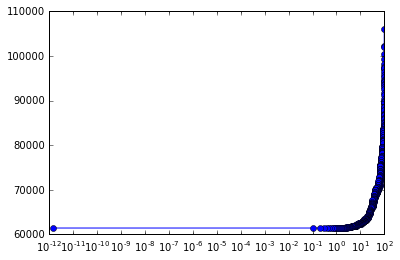

In [203]:
fig, ax = plt.subplots()
ax.semilogx(temperatures, fitness, marker='o')

In [206]:
save_tour('data_sim_annealing/'+str(fitness[-1])+'.json',
              np.array(best_tour_sim_annealing, dtype=int).tolist()) 

In [31]:
best_tour_sim_annealing = load_tour('data_sim_annealing/61445.060615886105.json')

Cost of tour is 61445.061


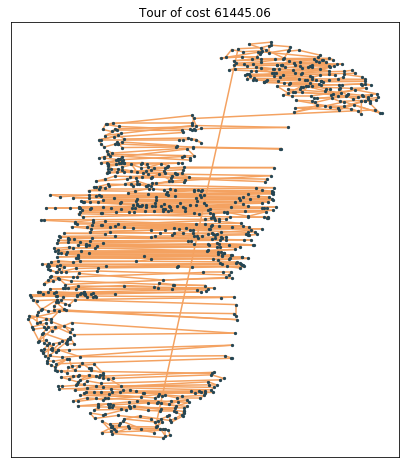

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_cities(ax, coordinates, color=blue)  # plot cities as a scatter plot
plot_tour(ax, best_tour_sim_annealing, coordinates, distances, color=orange, title=True)  # add the tour
cost = compute_tour_cost(best_tour_sim_annealing, distances, check=True)
print('Cost of tour is {:.3f}'.format(cost))

One can conclude that without a construction heuristic SA does not perform adequately within a reasonable computational time.

**SA on the best tour from NI**

In [ ]:
Tmax = 1e-5
Tmin = 0
r = 1e-8
kT = 100
# do the simulated annealing with the best tour of the previous nearest injection
best_tour_sim_annealing, fitness, temperatures = simulated_annealing(Tmax, Tmin, r, kT,
                                                                     tour=deepcopy(best_tour)
                                                                    )

In [ ]:
save_tour('data_sim_annealing/'+str(fitness[-1])+'_start_nearest_injection.json',
              np.array(best_tour_sim_annealing, dtype=int).tolist()) 

In [33]:
best_tour_sim_annealing = load_tour('data_sim_annealing/12116.767185575374_start_nearest_injection.json')

Cost of tour is 12116.767


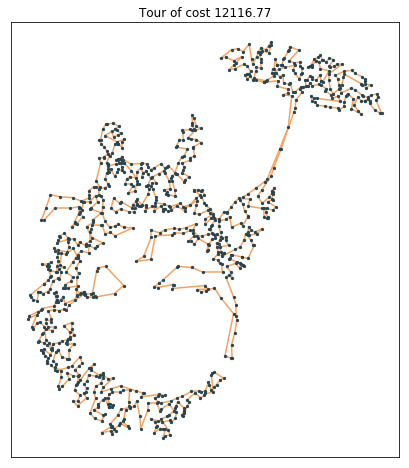

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_cities(ax, coordinates, color=blue)  # plot cities as a scatter plot
plot_tour(ax, best_tour_sim_annealing, coordinates, distances, color=orange, title=True)  # add the tour
cost = compute_tour_cost(best_tour_sim_annealing, distances, check=True)
print('Cost of tour is {:.3f}'.format(cost))

It can be concluded that SA is still able to improve on the optimal tour proposed by nearest insertion.

### Conclusions

A compound approach of NI and SA was performed. It was concluded that NI is a suitable construction algorithm for a TSP problem of 1025 cities yielding. After optimising the starting city, a total cost of tour of **12248.685** was achieved. In an attempt to further improve this, SA annealing was performed on the optimal solution of NI yielding a total cost of *12116.767*. It seems that the combination of NI and SA in a compound approach yields good results.  


### References
[[1]](https://paginas.fe.up.pt/~mac/ensino/docs/OR/HowToSolveIt/ConstructiveHeuristicsForTheTSP.pdf) José Fernando Oliveira, Maria Antonia Carravilla – FEUP, Heuristics and Local Search for the TSP problem 